In [5]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from ydata_profiling import ProfileReport
import dtale
import dtale.app as dtale_app
#dtale_app.USE_COLAB = True
import sketch
import imblearn

In [2]:
df = pd.read_csv("C:/TNG/Courses/Iverson/Arif/bank.csv", sep=';')
df.head(10)

age            job  marital  education default  balance housing loan  \
0   30     unemployed  married    primary      no     1787      no   no   
1   33       services  married  secondary      no     4789     yes  yes   
2   35     management   single   tertiary      no     1350     yes   no   
3   30     management  married   tertiary      no     1476     yes  yes   
4   59    blue-collar  married  secondary      no        0     yes   no   
5   35     management   single   tertiary      no      747      no   no   
6   36  self-employed  married   tertiary      no      307     yes   no   
7   39     technician  married  secondary      no      147     yes   no   
8   41   entrepreneur  married   tertiary      no      221     yes   no   
9   43       services  married    primary      no      -88     yes  yes   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  
5  cellular   23   feb       141         2    176         3  failure  no  
6  cellular   14   may       341         1    330         2    other  no  
7  cellular    6   may       151         2     -1         0  unknown  no  
8   unknown   14   may        57         2     -1         0  unknown  no  
9  cellular   17   apr       313         1    147         2  failure  no

In [31]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [16]:
df.shape

(4521, 17)

In [5]:
dup_temp = df[df.duplicated()]
dup_temp

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []

In [27]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [28]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [39]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [33]:
for col in df.columns:
    print(col,df[col].nunique())

age 67
job 12
marital 3
education 4
default 2
balance 2353
housing 2
loan 2
contact 3
day 31
month 12
duration 875
campaign 32
pdays 292
previous 24
poutcome 4
y 2


In [3]:
features = df.drop('y', axis=1)
target = df['y']

In [47]:
features.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  
0  cellular   19   oct        79         1     -1         0  unknown  
1  cellular   11   may       220         1    339         4  failure  
2  cellular   16   apr       185         1    330         1  failure  
3   unknown    3   jun       199         4     -1         0  unknown  
4   unknown    5   may       226         1     -1         0  unknown

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,target,train_size=0.9,random_state=0)

In [49]:
X_train.shape

(4068, 16)

In [52]:
X_test.shape

(453, 16)

In [8]:
cat_df = X_train[[feature for feature in X_train.columns if X_train[feature].dtype=='O']]
cat_df.head()

job   marital  education default housing loan    contact month  \
1511  unemployed    single  secondary      no      no   no   cellular   nov   
1119  management    single   tertiary      no     yes   no  telephone   may   
3750     retired  divorced    unknown      no      no   no  telephone   jul   
2868    services   married  secondary      no     yes   no   cellular   may   
2758      admin.   married   tertiary      no      no   no   cellular   aug   

     poutcome  
1511  unknown  
1119  unknown  
3750  failure  
2868  unknown  
2758  unknown

In [9]:
num_df = X_train[[feature for feature in X_train.columns if X_train[feature].dtype!='O']]
print(num_df.shape)
num_df.head()

(4068, 7)


age  balance  day  duration  campaign  pdays  previous
1511   34        0   17        63         2     -1         0
1119   28     4937   13       421         3     -1         0
3750   79     2628    8       220         7    450         2
2868   40      771   15       173         4     -1         0
2758   57       46    7       238         2     -1         0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

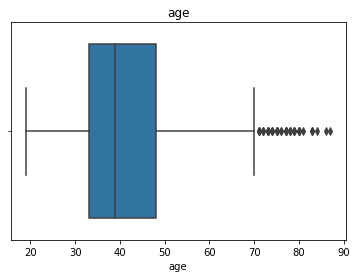

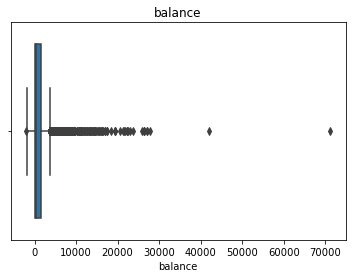

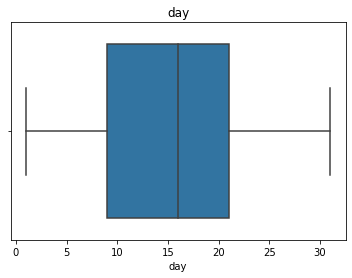

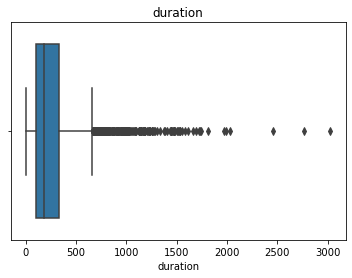

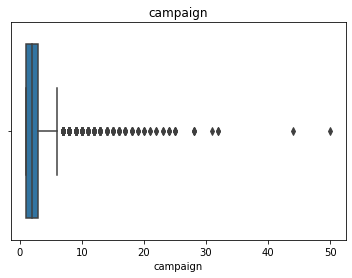

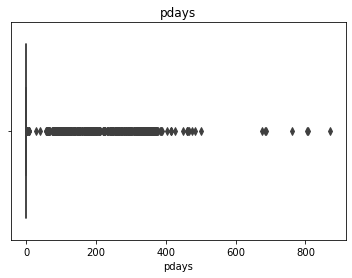

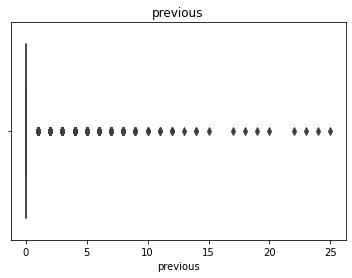

In [70]:
for col in num_df.columns:
    plt.figure()
    plt.title(col)
    sns.boxplot(num_df[col])

In [94]:
for col in num_df.columns:
    Q1 = num_df[col].quantile(0.25)
    Q3 = num_df[col].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    id = num_df[(num_df[col]<=lower) | (num_df[col]>=upper)].index
    num_df.drop(index=id, inplace=True)
    #lower_array = np.where(num_df[col]<=lower)[0]
    #num_df.drop(index=lower_array, inplace=True)
    #upper_array = np.where(num_df[col]>=upper)[0]
    #num_df.drop(index=upper_array, inplace=True)
    print(col,'Q1, Q3, New shape',Q1,Q3,num_df.shape)

C:\Users\s012792\AppData\Local\Temp\ipykernel_23660\3195386042.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df.drop(index=id, inplace=True)


age Q1, Q3, New shape 33.0 48.0 (4017, 7)
balance Q1, Q3, New shape 70.0 1477.0 (3572, 7)
day Q1, Q3, New shape 8.0 21.0 (3572, 7)
duration Q1, Q3, New shape 103.0 325.0 (3314, 7)
campaign Q1, Q3, New shape 1.0 3.0 (2966, 7)
pdays Q1, Q3, New shape -1.0 -1.0 (0, 7)
previous Q1, Q3, New shape nan nan (0, 7)


In [12]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
dtale.show(df)

In [16]:
# this will push data to OpenAI
df.sketch.ask("What is max values of each column?")

In [19]:
df.sketch.howto("How to plot y against all columns using count plot")

C:\Users\s012792\AppData\Roaming\Python\Python39\site-packages\dtale\views.py:778: FutureWarning:

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '28', '29', '30', '31', '32', '44', '50'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



In [21]:
cat_df.head()

job   marital  education default housing loan    contact month  \
1511  unemployed    single  secondary      no      no   no   cellular   nov   
1119  management    single   tertiary      no     yes   no  telephone   may   
3750     retired  divorced    unknown      no      no   no  telephone   jul   
2868    services   married  secondary      no     yes   no   cellular   may   
2758      admin.   married   tertiary      no      no   no   cellular   aug   

     poutcome  
1511  unknown  
1119  unknown  
3750  failure  
2868  unknown  
2758  unknown

In [22]:
pd.get_dummies(cat_df)

job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
1511           0                0                 0              0   
1119           0                0                 0              0   
3750           0                0                 0              0   
2868           0                0                 0              0   
2758           1                0                 0              0   
...          ...              ...               ...            ...   
1033           0                0                 0              0   
3264           0                0                 0              0   
1653           0                1                 0              0   
2607           0                1                 0              0   
2732           0                0                 0              0   

      job_management  job_retired  job_self-employed  job_services  \
1511               0            0                  0             0   
1119               1            0                  0             0   
3750               0            1                  0             0   
2868               0            0                  0             1   
2758               0            0                  0             0   
...              ...          ...                ...           ...   
1033               0            0                  0             0   
3264               1            0                  0             0   
1653               0            0                  0             0   
2607               0            0                  0             0   
2732               0            0                  0             0   

      job_student  job_technician  ...  month_jun  month_mar  month_may  \
1511            0               0  ...          0          0          0   
1119            0               0  ...          0          0          1   
3750            0               0  ...          0          0          0   
2868            0               0  ...          0          0          1   
2758            0               0  ...          0          0          0   
...           ...             ...  ...        ...        ...        ...   
1033            0               1  ...          0          0          1   
3264            0               0  ...          0          0          0   
1653            0               0  ...          0          0          0   
2607            0               0  ...          0          0          0   
2732            0               1  ...          1          0          0   

      month_nov  month_oct  month_sep  poutcome_failure  poutcome_other  \
1511          1          0          0                 0               0   
1119          0          0          0                 0               0   
3750          0          0          0                 1               0   
2868          0          0          0                 0               0   
2758          0          0          0                 0               0   
...         ...        ...        ...               ...             ...   
1033          0          0          0                 0               0   
3264          0          0          0                 0               0   
1653          0          0          0                 0               0   
2607          0          0          0                 0               0   
2732          0          0          0                 0               0   

      poutcome_success  poutcome_unknown  
1511                 0                 1  
1119                 0                 1  
3750                 0                 0  
2868                 0                 1  
2758                 0                 1  
...                ...               ...  
1033                 0                 1  
3264                 0                 1  
1653                 1                 0  
2607                 0                 1  
2732                 0                 1  

[4068

2023-07-10 16:11:57,098 - INFO     - Executing shutdown due to inactivity...
2023-07-10 16:12:01,183 - INFO     - Executing shutdown...
C:\Users\s012792\AppData\Roaming\Python\Python39\site-packages\dtale\app.py:427: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.

